# Diagnostics of simulation results

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.colors import LogNorm
import Utilitis_HybridCode as utils


# ... import simulation data
data1 = np.loadtxt('Results/02_DipoleField/data_Xin_1.txt')
data2 = np.loadtxt('Results/02_DipoleField/data_Xin_2.txt')
data3 = np.loadtxt('Results/02_DipoleField/data_Xin_3.txt')
# ...

In [81]:
# ... get simulation parameters 
# (0: eps0, 1: mu0, 2: c, 3: qe, 4: me, 5: B0z)
# (6: wce, 7: wpe, 8: nuh, 9: nh, 10: wpar)
# (11: wperp, 12: k, 13: ini, 14: amp, 15: eps)
# (16: Lz, 17: Nel, 18: T, 19: dt, 20: p)
# (21: Lv, 22: Nv, 23: Np, 24: xi, 25: Ld)
# (26: bcs_p, 27: bcs_f, 28: bcs_d, 29: bcs_g, 30: saving_step)


pa1 = data1[0]
pa2 = data2[0]
pa3 = data3[0]
s = 6

def getParameters(pa):
    eps0  = pa[0]
    mu0   = pa[1]
    c     = pa[2]
    qe    = pa[3]
    me    = pa[4]
    B0z   = pa[5]
    wce   = pa[6]
    wpe   = pa[7]
    nuh   = pa[8]
    nh    = pa[9]
    wpar  = pa[10]
    wperp = pa[11]
    k     = pa[12]
    ini   = np.int(pa[13])
    amp   = pa[14]
    eps   = pa[15]
    Lz    = pa[16]
    Nz    = np.int(pa[17])
    T     = pa[18]
    dt    = pa[19]
    p     = np.int(pa[20])
    Lv    = pa[21]
    Nv    = np.int(pa[22])
    Np    = np.int(pa[23])
    xi    = pa[24]
    Ld    = pa[25]

    bcs_p = pa[26]
    bcs_f = pa[27]
    bcs_d = pa[28]
    bcs_g = pa[29]
    saving_step = pa[30]
    
    return eps0, mu0,c, qe, me, B0z, wce, wpe, nuh, nh, wpar, wperp, k, ini, amp, eps, Lz, Nz, T, dt, p, Lv, Nv, Np, xi, Ld, bcs_p, bcs_f, bcs_d, bcs_g, saving_step

eps0, mu0,c, qe, me, B0z, wce, wpe, nuh, nh, wpar, wperp, k, ini, amp, eps, Lz, Nz, T, dt, p, Lv, Nv, Np, xi, Ld, bcs_p, bcs_f, bcs_d, bcs_g, saving_step = getParameters(pa3)
# ...

In [82]:
Np

2000000

In [83]:
# ... get simulation data
def getData(data):
    if bcs_f == 1:

        Nb = Nz
        uj = data[1:, 0:s*Nb]
        yhj = data[1:, s*Nb:8*Nb]

        Nt_data = len(uj[:, 0]) - 1
        dt_data = dt*saving_step
        tn_data = np.linspace(0, Nt_data*dt_data, Nt_data + 1)

        ejx  = uj[:, 0::6]
        ejy  = uj[:, 1::6]
        bjx  = uj[:, 2::6]
        bjy  = uj[:, 3::6]
        ycjx = uj[:, 4::6]
        ycjy = uj[:, 5::6]
        yhjx = yhj[:, 0::2]
        yhjy = yhj[:, 1::2]

        en_e  = data1[1:, -5]
        en_b  = data1[1:, -4]
        en_jc = data1[1:, -3]
        en_jh = data1[1:, -2]

    elif bcs_f == 2:

        Nb = Nz + p - 2
        uj = data[1:, 0:s*Nb]
        yhj = data[1:, s*Nb:8*Nb]

        Nt_data = len(uj[:, 0]) - 1
        dt_data = dt*saving_step
        tn_data = np.linspace(0, Nt_data*dt_data, Nt_data + 1)

        ejx = np.c_[np.zeros(Nt_data + 1), uj[:, 0::6], np.zeros(Nt_data + 1)]
        ejy = np.c_[np.zeros(Nt_data + 1), uj[:, 1::6], np.zeros(Nt_data + 1)]
        bjx = np.c_[np.zeros(Nt_data + 1), uj[:, 2::6], np.zeros(Nt_data + 1)]
        bjy = np.c_[np.zeros(Nt_data + 1), uj[:, 3::6], np.zeros(Nt_data + 1)]

        ycjx = np.c_[np.zeros(Nt_data + 1), uj[:, 4::6], np.zeros(Nt_data + 1)]
        ycjy = np.c_[np.zeros(Nt_data + 1), uj[:, 5::6], np.zeros(Nt_data + 1)]
        yhjx = yhj[:, 0::2]
        yhjy = yhj[:, 1::2]
        
        
        
    return ejx, ejy, bjx, bjy, ycjx, ycjy, yhjx, yhjy, tn_data, Nt_data, dt_data

ejx, ejy, bjx, bjy, ycjx, ycjy, yhjx, yhjy, tn_data_3, Nt_data, dt_data = getData(data3)
# ...


# ... define fields
def damp(z):
    return 0*z

def B0(z):
    return 0*z
# ...



# ... create B-spline basis and compute mass matrix
basis, N, quad_points, weights = utils.createBasis(Lz, Nz, p, bcs_f)
M = utils.matrixAssembly(basis, weights, quad_points, B0, bcs_f)[0]
# ...



# ... solve the dispersion relation for a fixed k to get ocillation frequency and growth rate 
omega = utils.solveDispersionHybrid(k, +1 , c, wce, wpe, wpar, wperp, nuh, 0.5 + 0j, 1e-6, 100)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)
# ...

In [84]:
Nz

800

In [85]:
gamma = 0.012961128984215562

Text(0.5,1,'spectrogram in linear phase')

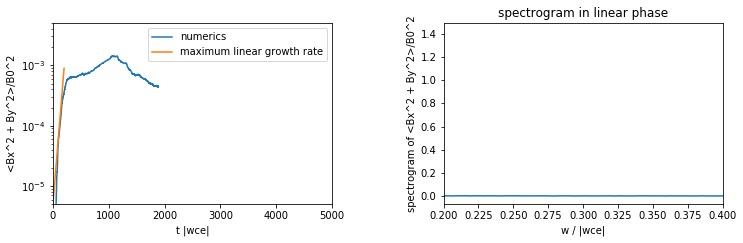

In [86]:
# ... compute averaged quadratic magnetic field (x and x + y)
mean_Bx2_3 = np.zeros(Nt_data + 1)
mean_B2_3  = np.zeros(Nt_data + 1)

for j in range(0, Nt_data + 1):
    mean_Bx2_3[j] = 1/Lz*(np.dot(bjx[j], np.dot(M, bjx[j])))
    mean_B2_3[j]  = 1/Lz*(np.dot(bjx[j], np.dot(M, bjx[j])) + np.dot(bjy[j], np.dot(M, bjy[j])))
# ...

                       
                       
# ... compute fft for frequency analysis in linear phase 
Ntend = Nt_data
spec = np.fft.fft(mean_Bx2_3[0:Ntend + 1])
spec = np.fft.fftshift(spec)
w = np.linspace(0, Ntend, Ntend + 1) - Ntend/2
w = 2*np.pi*w/(Ntend*dt_data)
# ...



                       
# ... plot results
f1 = plt.figure()
f1.set_figheight(8)
f1.set_figwidth(12)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(221)
plt.semilogy(tn_data_3, mean_B2_3,label = 'numerics')
t2 = np.linspace(0, 200, 100)
plt.semilogy(t2, 5e-6*np.exp(t2*gamma*2),label = 'maximum linear growth rate')
plt.xlabel('t |wce|')
plt.ylabel('<Bx^2 + By^2>/B0^2')
plt.xlim((0, 5000))
plt.ylim((5e-6, 5e-3))
plt.legend()

plt.subplot(222)
plt.plot(w,np.abs(spec))
plt.xlim((0.2, 0.4))
plt.xlabel('w / |wce|')
plt.ylabel('spectrogram of <Bx^2 + By^2>/B0^2')
#plt.plot(np.ones(20)*2*omega_r,np.linspace(0,4e-6,20),label = 'expected real frequency')
#plt.legend()
plt.title('spectrogram in linear phase')
# ...

In [23]:
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)
Bx = np.zeros(Nt_data + 1)

for i in range(0, Nt_data + 1):
    if i%500 == 0:
        print(i)
    Bx[i] = utils.evaluation(bjx[i], basis, zj, np.array([Lz/2 - 25]), bcs_f)

0
500
1000
1500
2000
2500
3000
3500


In [26]:
t

array([  37.5,   62.5,   87.5,  112.5,  137.5,  162.5,  187.5,  212.5,
        237.5,  262.5,  287.5,  312.5,  337.5,  362.5,  387.5,  412.5,
        437.5,  462.5,  487.5,  512.5,  537.5,  562.5,  587.5,  612.5,
        637.5,  662.5,  687.5,  712.5,  737.5,  762.5,  787.5,  812.5,
        837.5,  862.5,  887.5,  912.5,  937.5,  962.5,  987.5, 1012.5,
       1037.5, 1062.5, 1087.5, 1112.5, 1137.5, 1162.5, 1187.5, 1212.5,
       1237.5, 1262.5, 1287.5, 1312.5, 1337.5, 1362.5, 1387.5, 1412.5,
       1437.5, 1462.5, 1487.5, 1512.5, 1537.5, 1562.5, 1587.5, 1612.5,
       1637.5, 1662.5, 1687.5, 1712.5, 1737.5, 1762.5, 1787.5, 1812.5,
       1837.5])

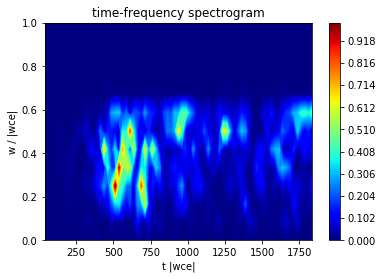

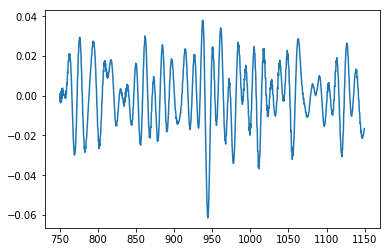

In [42]:
# ... compute time-frequency spectrum
f, t, Sxx = signal.spectrogram(Bx, 1/dt_data, nperseg = 150, noverlap = 100, nfft = None)
om = 2*np.pi*f
lvls = np.logspace(-3,0,200)
Time, Omega = np.meshgrid(t, om)
# .


plt.contourf(Time, Omega, Sxx/Sxx.max(), 500, cmap = 'jet')
#plt.contourf(Time,Omega,Sxx/Sxx.max(),norm = LogNorm(),levels = lvls, cmap = 'jet')
#plt.contourf(Time,Omega,Sxx/Sxx.max(),norm = LogNorm(), cmap = 'jet')

#plt.plot(np.linspace(t[0],t[-1],100),np.ones(100)*omega_r*2,'k--')
plt.xlabel('t |wce|')
plt.ylabel('w / |wce|')
plt.ylim((0,1))
#plt.xlim((0,10000))
plt.colorbar()
plt.title('time-frequency spectrogram')

plt.figure()
plt.plot(tn_data[1500:2300],Bx[1500:2300])
#plt.plot(tn_data, Bx)

In [39]:
# ... compute 2D fft to investigate dispersion relation
w = np.linspace(0, Nt_data, Nt_data + 1) - Nt_data/2
w = 2*np.pi/T*w

ks = np.linspace(0, Nz, Nz + 1) - Nz/2
ks = 2*np.pi/Lz*ks

Bx = np.zeros((Nt_data + 1, Nz + 1))

for i in range(0, Nt_data + 1):
    if i%500 == 0:
        print('time steps finished: ' + str(i))
    Bx[i] = utils.evaluation(bjx[i], basis, zj, zj, bcs_f)

time steps finished: 0
time steps finished: 500
time steps finished: 1000
time steps finished: 1500
time steps finished: 2000
time steps finished: 2500


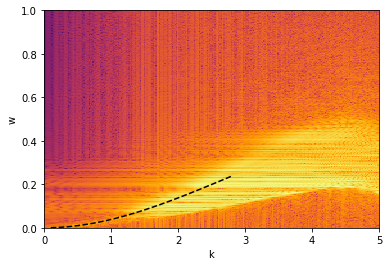

In [43]:
Bxkw = np.fft.fft2(Bx)
K, W = np.meshgrid(ks, w)
Bkw = np.fft.fftshift(Bxkw)
Bkw_plot = np.abs(Bkw)/np.abs(Bkw).max()
plt.pcolor(K, W, Bkw_plot, cmap = 'inferno', norm = LogNorm(vmin = Bkw_plot.min(), vmax = Bkw_plot.max()))
plt.xlim((0, 5))
plt.ylim((0, 1))
plt.xlabel('k')
plt.ylabel('w')

# ... Newton method for cold plasma dispersion relation for fixed k
k1 = np.linspace(0.1, 2.8, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i],+1,c,wce,wpe,w1_1[i],1e-6,100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i],-1,c,wce,wpe,w1_2[i],1e-6,100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i],+1,c,wce,wpe,w1_3[i],1e-6,100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i],+1,c,wce,wpe,w1_1[i-1],1e-6,100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i],-1,c,wce,wpe,w1_2[i-1],1e-6,100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i],+1,c,wce,wpe,w1_3[i-1],1e-6,100)[0]
    
# ...

plt.plot(k1,w1_1,'k--')
#plt.plot(k1,w1_2,'k--')
#plt.plot(k1,w1_3,'k--')

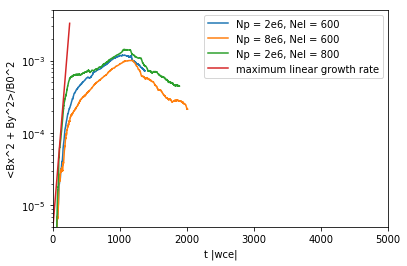

In [89]:
plt.semilogy(tn_data_1, mean_B2_1,label = 'Np = 2e6, Nel = 600')
plt.semilogy(tn_data_2, mean_B2_2,label = 'Np = 8e6, Nel = 600')
plt.semilogy(tn_data_3, mean_B2_3,label = 'Np = 2e6, Nel = 800')
t2 = np.linspace(0, 250, 100)
plt.semilogy(t2, 5e-6*np.exp(t2*gamma*2),label = 'maximum linear growth rate')
plt.xlabel('t |wce|')
plt.ylabel('<Bx^2 + By^2>/B0^2')
plt.xlim((0, 5000))
plt.ylim((5e-6, 5e-3))
plt.legend()
